In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
races = pd.read_csv("../data/races.csv")
Abu_Dhabi_GP_2021 = races[races['date'] == '2021-12-12'][['raceId', 'round']]

In [129]:
lap_times = pd.read_csv("../data/lap_times.csv")
lap_times['seconds'] = lap_times['milliseconds'] / 1000
lap_times_Abu_Dhabi_GP_2021 = lap_times[lap_times['raceId'] == Abu_Dhabi_GP_2021['raceId'].values[0]]
print(lap_times_Abu_Dhabi_GP_2021)

        raceId  driverId  lap  position      time  milliseconds  seconds
513594    1073         1    1         1  1:31.686         91686   91.686
513595    1073         1    2         1  1:28.791         88791   88.791
513596    1073         1    3         1  1:28.587         88587   88.587
513597    1073         1    4         1  1:28.789         88789   88.789
513598    1073         1    5         1  1:28.630         88630   88.630
...        ...       ...  ...       ...       ...           ...      ...
514587    1073       847   22        15  1:30.821         90821   90.821
514588    1073       847   23        15  1:30.647         90647   90.647
514589    1073       847   24        14  1:31.577         91577   91.577
514590    1073       847   25        16  1:32.794         92794   92.794
514591    1073       847   26        18  2:46.262        166262  166.262

[998 rows x 7 columns]


In [130]:
consistency_by_driver = lap_times_Abu_Dhabi_GP_2021.groupby('driverId')['seconds'].agg(['mean', 'std']).round(2).reset_index()
consistency_by_driver = consistency_by_driver.sort_values(by='std')
print(consistency_by_driver)

    driverId   mean    std
11       841  91.52   4.00
16       849  92.31   5.00
12       842  93.52  10.22
4        815  91.86  10.30
17       852  93.50  10.81
2          8  94.54  11.00
6        822  93.53  11.22
8        832  93.49  11.35
18       854  95.19  11.52
3         20  94.57  12.78
9        839  94.51  13.21
10       840  95.18  13.37
1          4  94.47  13.41
13       844  94.54  13.58
14       846  94.42  13.98
5        817  95.10  14.31
15       847  95.03  14.71
7        830  93.40  15.28
0          1  93.44  15.66


In [131]:
drivers = pd.read_csv('../data/drivers.csv')
print(drivers.head())

   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  


In [132]:
consistency_by_driver = consistency_by_driver.merge(drivers[['driverId', 'driverRef']], on='driverId')
consistency_by_driver = consistency_by_driver[['driverId', 'driverRef', 'mean', 'std']]
consistency_by_driver['driverRef'] = consistency_by_driver['driverRef'].str.upper()
#consistency_by_driver.rename(columns={'code': 'driverCode'}, inplace=True)
print(consistency_by_driver)

    driverId        driverRef   mean    std
0        841       GIOVINAZZI  91.52   4.00
1        849           LATIFI  92.31   5.00
2        842            GASLY  93.52  10.22
3        815            PEREZ  91.86  10.30
4        852          TSUNODA  93.50  10.81
5          8        RAIKKONEN  94.54  11.00
6        822           BOTTAS  93.53  11.22
7        832            SAINZ  93.49  11.35
8        854  MICK_SCHUMACHER  95.19  11.52
9         20           VETTEL  94.57  12.78
10       839             OCON  94.51  13.21
11       840           STROLL  95.18  13.37
12         4           ALONSO  94.47  13.41
13       844          LECLERC  94.54  13.58
14       846           NORRIS  94.42  13.98
15       817        RICCIARDO  95.10  14.31
16       847          RUSSELL  95.03  14.71
17       830   MAX_VERSTAPPEN  93.40  15.28
18         1         HAMILTON  93.44  15.66


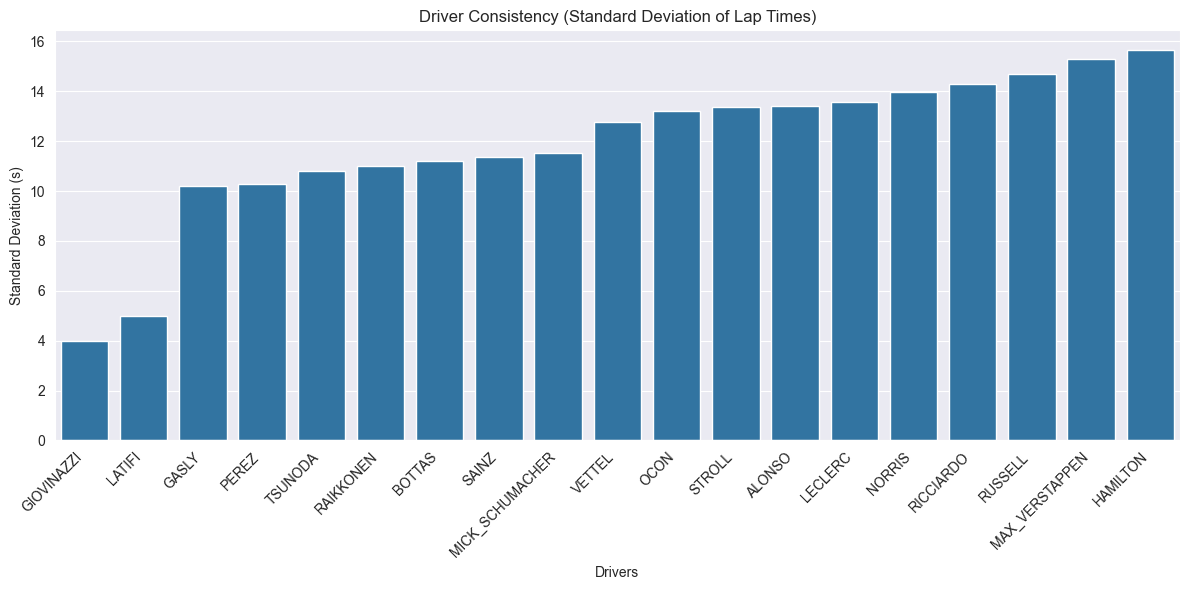

In [136]:
plt.figure(figsize=(12, 6))

sns.barplot(data=consistency_by_driver, x='driverRef', y='std', order=consistency_by_driver.sort_values('std')['driverRef'])

plt.xticks(rotation=45, ha='right')
plt.title('Driver Consistency (Standard Deviation of Lap Times)')
plt.xlabel('Drivers')
plt.ylabel('Standard Deviation (s)')
plt.tight_layout()
plt.show()